In [16]:
import pandas as pd

In [17]:
hotels = pd.read_csv('./data/hotels.csv.zip')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [18]:
# Удаление нечисловых колонок
cols_to_drop = []
for col in hotels.columns:
    if hotels[col].dtype not in ['int64', 'float64']:
        cols_to_drop.append(col)
hotels.drop(cols_to_drop, axis='columns', inplace=True)
print('Deleted next columns:', cols_to_drop)

object
object
object
object
object
object
object
object
Deleted next columns: ['hotel_address', 'review_date', 'hotel_name', 'reviewer_nationality', 'negative_review', 'positive_review', 'tags', 'days_since_review']


In [19]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 9 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   reviewer_score                              386803 non-null  float64
 7   lat                                         384355 non-null  float64
 8   lng                                         384355 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 26.6 MB


In [20]:
# заполняем пропуски
na_values = {
    'lat': hotels['lat'].mean(),
    'lng': hotels['lng'].mean()
}
hotels.fillna(na_values, inplace=True)
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 9 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   reviewer_score                              386803 non-null  float64
 7   lat                                         386803 non-null  float64
 8   lng                                         386803 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 26.6 MB


In [21]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

In [22]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [23]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [25]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
# 0.14138286324223787 (baseline)
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.14121133086242038


Небольшой бонус:


In [10]:
# # убираем признаки которые еще не успели обработать, 
# # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
# object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
# hotels.drop(object_columns, axis = 1, inplace=True)

# # заполняем пропуски самым простым способом
# hotels = hotels.fillna(0)

In [31]:
X.describe()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,lat,lng
count,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.00000,386803.000000,386803.000000
mean,498.246536,8.397231,18.538988,2743.992042,17.776985,7.17725,49.443522,2.823402
std,500.258012,0.547881,29.703369,2316.457018,21.726141,11.05442,3.455948,4.564530
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.00000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.00000,48.214662,-0.143372
50%,342.000000,8.400000,9.000000,2134.000000,11.000000,3.00000,51.499981,0.019886
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.00000,51.516288,4.831098
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.00000,52.400181,16.429233


In [28]:
# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts']

# категориальные признаки
cat_cols = ['average_score', 'lat']

<AxesSubplot: >

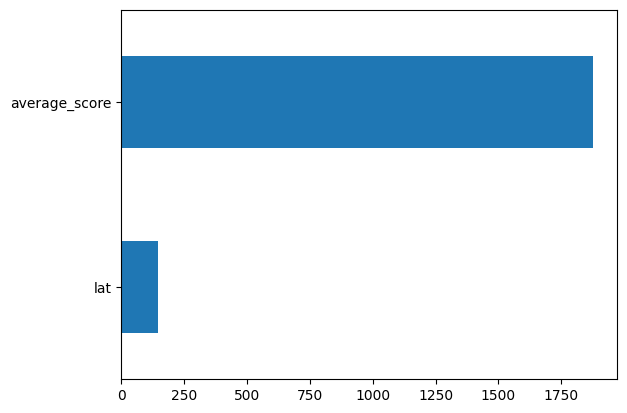

In [29]:
y=y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [32]:
df = pd.read_csv('data/hotels.csv.zip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [34]:
df['hotel_name'].nunique()

1492

In [35]:
df['review_date'] = pd.to_datetime(df['review_date'])

In [36]:
df['review_date'].describe()

C:\Users\admin\AppData\Local\Temp\ipykernel_6724\1845268067.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['review_date'].describe()


count                  386803
unique                    731
top       2017-08-02 00:00:00
freq                     1911
first     2015-08-04 00:00:00
last      2017-08-03 00:00:00
Name: review_date, dtype: object

In [62]:
print(df['tags'].nunique())
df['tags'].head()
dict_count_tags = {}
dict_count_tags_icase = {}
set_eq = set()

def count_tags(tags_string):
    tags = eval(tags_string)
    for tag in tags:
        tag = tag.strip() #.lower()
        if tag not in dict_count_tags:
            dict_count_tags[tag] = 0
        dict_count_tags[tag] += 1
        
        tag_i = tag.lower()
        if tag_i not in dict_count_tags_icase:
            dict_count_tags_icase[tag_i] = 0
        dict_count_tags_icase[tag_i] += 1
        if tag == tag_i:
            set_eq.add(tag)

df['tags'].apply(count_tags)
print(len(dict_count_tags), len(dict_count_tags_icase))

47135
2368 2361


In [63]:
set1 = set(dict_count_tags.keys())
set2 = set(dict_count_tags_icase.keys())
print(set_eq)

{'4 rooms', '2 rooms', '3 rooms', '5 rooms'}


In [72]:
lst_vals = [list(dict_count_tags.values()), list(dict_count_tags_icase.values())]
lst_vals[0].sort()
lst_vals[1].sort()
for i in lst_vals:
    print(i[0], i[-1])#
for k,v in dict_count_tags.items():
    if v == 313593:
        print(k)
    if 'night' in k:
        print(k, v)



1 313593
1 313593
Leisure trip
Stayed 2 nights 100263
Stayed 1 night 145373
Stayed 3 nights 72000
Stayed 6 nights 7399
Stayed 4 nights 35748
Stayed 5 nights 15611
Stayed 8 nights 1910
Stayed 7 nights 5549
Stayed 10 nights 663
Stayed 14 nights 184
Stayed 19 nights 23
Stayed 13 nights 174
Stayed 9 nights 966
Stayed 17 nights 27
Stayed 11 nights 306
Stayed 27 nights 10
Stayed 12 nights 217
Stayed 15 nights 87
Stayed 21 nights 19
Stayed 18 nights 24
Stayed 16 nights 38
Stayed 26 nights 6
Special Offer Double Room 3 nights minimum 6
Stayed 24 nights 5
Stayed 30 nights 10
Stayed 22 nights 8
King Room with Knightsbridge View 8
Suite with Knightsbridge View 1
Stayed 23 nights 6
Stayed 28 nights 7
Stayed 20 nights 17
Junior Suite Give me the night 4
Stayed 25 nights 4
Knightsbridge Suite 1
Stayed 29 nights 3


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386803 non-null  object        
 1   additional_number_of_scoring                386803 non-null  int64         
 2   review_date                                 386803 non-null  datetime64[ns]
 3   average_score                               386803 non-null  float64       
 4   hotel_name                                  386803 non-null  object        
 5   reviewer_nationality                        386803 non-null  object        
 6   negative_review                             386803 non-null  object        
 7   review_total_negative_word_counts           386803 non-null  int64         
 8   total_number_of_reviews                     386803 non-null  int64        

In [75]:
for col in df.columns:
    print(col, df[col].nunique())

hotel_address 1493
additional_number_of_scoring 480
review_date 731
average_score 34
hotel_name 1492
reviewer_nationality 225
negative_review 248828
review_total_negative_word_counts 402
total_number_of_reviews 1142
positive_review 311737
review_total_positive_word_counts 354
total_number_of_reviews_reviewer_has_given 194
reviewer_score 37
tags 47135
days_since_review 731
lat 1472
lng 1472
